In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean 13.20 dollar and standard deviation 2.50 dollar. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18) 

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [9]:
μ = 13.20
σ = 2.50
n = 40 
x = 12.20
α = 0.01  # Type I Error-Significance Level
# 1- α  # Confidence Level

In [10]:
σ_xi = σ/(np.sqrt(n))
σ_xi

0.3952847075210474

In [11]:
z_score = (x-μ)/(σ_xi)
z_score

-2.5298221281347035

In [12]:
p = stats.norm.sf(abs(z_score))
p

0.005706018193000826

In [39]:
if p<α:
    print("REJECT Null Hypothesis")
else:
    print("DO NOT REJECT Null Hypothesis")

REJECT Null Hypothesis


EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06 

In [14]:
soil = pd.read_csv("soil.csv", sep=",")

In [15]:
soil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [16]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Soil1   30 non-null     float64
 1   Soil2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [17]:
soil.shape

(35, 2)

In [18]:
soil.agg([np.mean, np.median, max, min, np.std, np.var])

,Soil1,Soil2
mean,1.691800,1.417114
median,1.675000,1.379000
max,2.054000,1.878000
min,1.110000,1.053000
std,0.206903,0.219184
var,0.042809,0.048042


In [19]:
from PIL import Image

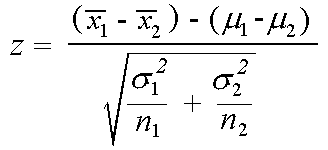

In [20]:
image = Image.open('formula.png')
image

In [21]:
list1 = soil.Soil1.dropna()
list1

0     1.442
1     1.943
2     1.110
3     1.912
4     1.553
5     1.641
6     1.499
7     1.347
8     1.685
9     1.578
10    1.866
11    1.653
12    1.665
13    1.640
14    1.976
15    1.754
16    1.589
17    1.976
18    1.863
19    1.932
20    1.570
21    1.613
22    2.054
23    1.550
24    1.714
25    1.896
26    1.737
27    1.740
28    1.708
29    1.548
Name: Soil1, dtype: float64

In [22]:
list2 = soil.Soil2.dropna()
list2

0     1.364
1     1.878
2     1.337
3     1.828
4     1.371
5     1.428
6     1.119
7     1.373
8     1.589
9     1.714
10    1.260
11    1.492
12    1.395
13    1.778
14    1.611
15    1.202
16    1.542
17    1.094
18    1.557
19    1.053
20    1.183
21    1.367
22    1.144
23    1.151
24    1.561
25    1.192
26    1.489
27    1.379
28    1.501
29    1.277
30    1.593
31    1.172
32    1.510
33    1.740
34    1.355
Name: Soil2, dtype: float64

In [23]:
from statsmodels.stats import weightstats as stests

In [24]:
ztest ,pval = stests.ztest(list1, list2, value=0, alternative='two-sided')
print(float(ztest))
print(float(pval))  # stats.norm.sf(abs(ztest))*2

5.1681473319343345
2.3642590643591074e-07


In [27]:
test = stats.ttest_ind(list1, list2)
test

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

In [28]:
test.statistic

5.1681473319343345

In [29]:
test.pvalue

2.593228732352821e-06

In [38]:
output = "{:.8f}".format(test.pvalue)
output

'0.00000259'

In [31]:
if test.pvalue<0.01:
    print("REJECT Null Hypothesis")
else:
    print("DO NOT REJECT Null Hypothesis")

REJECT Null Hypothesis


EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

1.Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).

2.Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [40]:
df = pd.read_csv("data.csv", sep=",", index_col = 0)

In [41]:
df 

,Continent_Code,internet_users_per_100,Math,Reading,Science
Country Code,,,,,
ALB,EU,63.252933,413.1570,405.2588,427.2250
ARE,AS,90.500000,427.4827,433.5423,436.7311
ARG,SA,68.043064,409.0333,425.3031,432.2262
AUS,OC,84.560519,493.8962,502.9006,509.9939
AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...
TUN,AF,48.519836,366.8180,361.0555,386.4034
TUR,EU,53.744979,420.4540,428.3351,425.4895
URY,SA,64.600000,417.9919,436.5721,435.3630


In [42]:
df.head()

,Continent_Code,internet_users_per_100,Math,Reading,Science
Country Code,,,,,
ALB,EU,63.252933,413.1570,405.2588,427.2250
ARE,AS,90.500000,427.4827,433.5423,436.7311
ARG,SA,68.043064,409.0333,425.3031,432.2262
AUS,OC,84.560519,493.8962,502.9006,509.9939
AUT,EU,83.940142,496.7423,484.8656,495.0375


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, ALB to VNM
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Continent_Code          65 non-null     object 
 1   internet_users_per_100  70 non-null     float64
 2   Math                    70 non-null     float64
 3   Reading                 70 non-null     float64
 4   Science                 70 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.3+ KB


In [44]:
#1

In [45]:
df.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [46]:
df.shape

(70, 5)

In [47]:
df.Continent_Code.value_counts()

EU    37
AS    17
SA     7
OC     2
AF     2
Name: Continent_Code, dtype: int64

In [48]:
df.Continent_Code.mode()

0    EU
dtype: object

In [49]:
df.groupby(["Continent_Code"]).agg([np.mean, np.median, max, min, np.std, np.var]).internet_users_per_100

,mean,median,max,min,std,var
Continent_Code,,,,,,
AF,43.359918,43.359918,48.519836,38.200000,7.297226,53.249507
AS,68.455613,74.000000,92.884826,21.976068,21.086060,444.621918
EU,77.274888,76.184000,98.200000,53.744979,12.425773,154.399841
OC,86.391704,86.391704,88.222889,84.560519,2.589686,6.706475
SA,60.180494,64.289000,69.198471,40.900000,9.772455,95.500869


In [50]:
df.groupby(["Continent_Code"]).agg([np.mean, np.median, max, min, np.std, np.var]).Math

,mean,median,max,min,std,var
Continent_Code,,,,,,
AF,363.212100,363.21210,366.8180,359.6062,5.099513,26.005030
AS,466.216647,459.81600,564.1897,380.2590,64.356490,4141.757822
EU,477.981449,489.72870,521.2506,371.3114,35.150403,1235.550805
OC,494.559750,494.55975,495.2233,493.8962,0.938401,0.880597
SA,402.887700,409.03330,422.6714,377.0695,18.128894,328.656783


In [51]:
df.groupby(["Continent_Code"]).agg([np.mean, np.median, max, min, np.std, np.var]).Reading

,mean,median,max,min,std,var
Continent_Code,,,,,,
AF,355.457400,355.45740,361.0555,349.8593,7.916909,62.677447
AS,454.059682,433.54230,535.1002,346.5490,57.048962,3254.584049
EU,476.164608,487.25010,526.4247,351.7415,37.720545,1422.839540
OC,506.085650,506.08565,509.2707,502.9006,4.504341,20.289087
SA,425.359229,425.30310,458.5709,397.5414,19.709688,388.471816


In [52]:
df.groupby(["Continent_Code"]).agg([np.mean, np.median, max, min, np.std, np.var]).Science

,mean,median,max,min,std,var
Continent_Code,,,,,,
AF,381.074250,381.07425,386.4034,375.7451,7.536556,56.799679
AS,467.945847,456.48360,555.5747,386.4854,56.671371,3211.644321
EU,478.299381,490.22500,534.1937,383.6824,34.450616,1186.844969
OC,511.648700,511.64870,513.3035,509.9939,2.340241,5.476726
SA,421.747186,424.59050,446.9561,396.6836,18.470319,341.152678


In [53]:
#2

In [54]:
group1 = df.loc[df["Continent_Code"] == "AS"].Math
group2 = df.loc[df["Continent_Code"] == "EU"].Math

In [55]:
two_sample = stats.ttest_ind(a=group1, b=group2, equal_var=True)
two_sample

Ttest_indResult(statistic=-0.870055317967983, pvalue=0.38826888111307345)

In [56]:
p_value = two_sample.pvalue
p_value

0.38826888111307345

In [57]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null")
else:
    print("Do not reject the null")

Do not reject the null


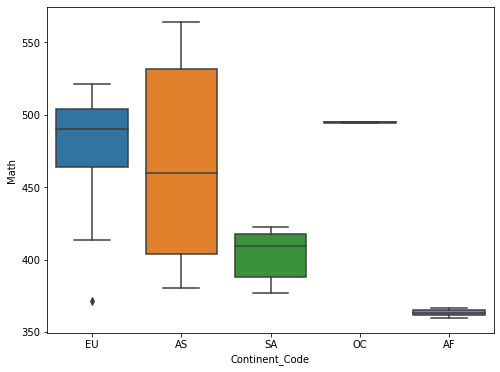

In [58]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Continent_Code", y="Math", data=df);